In [1]:
import datetime

In [2]:
import findspark
findspark.init()

In [3]:
from pyspark import SparkContext
print(SparkContext.version)

In [4]:
sc = SparkContext()

In [5]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
import pickle
from urllib.request import urlopen
import os
import pandas as pd
import numpy as np
import gensim
import pickle
import matplotlib.pyplot as plt

In [7]:
os.chdir("D://Datasets")

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/Galeforse/DST-Assessment-05/main/Data/NCSC%20Reports.csv')

In [9]:
df.head()

,Unnamed: 0,Title,Article,topics,Links
0,0,23rd April 2021,['The NCSC is aware that a malicious piece of ...,"['Cyber attack', 'Cyber strategy', 'Education'...",https://www.ncsc.gov.uk/report/weekly-threat-r...
1,1,16th April 2021,['Cyber security researchers have uncovered a ...,"['Cyber strategy', 'Patching', 'Vulnerabilities']",https://www.ncsc.gov.uk/report/weekly-threat-r...
2,2,12th April 2021,"['Cyber security researchers, Esentire, have w...","['Phishing', 'Social media', 'Personal data', ...",https://www.ncsc.gov.uk/report/weekly-threat-r...
3,3,2nd April 2021,['The UK education sector continues to face an...,"['Education', 'Incident management', 'Secure d...",https://www.ncsc.gov.uk/report/weekly-threat-r...
4,4,26th March 2021,['Earlier this month Microsoft confirmed that ...,"['Cyber attack', 'Education', 'Mitigation', 'P...",https://www.ncsc.gov.uk/report/weekly-threat-r...


In [10]:
print(np.shape(df))

(221, 5)


In [11]:
df.iloc[4,2]

"['Earlier this month Microsoft confirmed that sophisticated actors had attacked a number of Exchange servers and have released multiple security updates since.\\nThe NCSC is strongly urging any organisation using affected versions to proactively search their system for evidence of compromise, in line with Microsoft guidance.\\nOur alert was updated last week with the most recent advice and guidance.', 'A new report has revealed that almost 40% of UK businesses experienced a cyber attack last year.', 'The Cyber Security Breaches Survey 2021 report, published by the Department of Digital, Culture, Media and Sport (DCMS), also revealed that a quarter of charities have suffered a cyber security breach or attack in the past 12 months.', 'The NCSC has produced guidance to address some of the most common breaches and attacks identified in the report:\\nphishing emails\\nviruses\\nransomware\\nWhere a breach has resulted in a loss of data or assets, the average cost of a cyber attack on a bus

In [12]:
import nltk
from nltk.corpus import stopwords

In [13]:
l1 = stopwords.words('english')
l2 = ['have', 'with', 'cannot', 'all', 'more', 'less', 'fewer', 'if', 'from', 'new', 'old', 'be', 'This']
l1.append(l2)
lst1 = [' {} '.format(x) for x in l1]

len(lst1)

180

In [14]:
df['Article'].replace(lst1, " ", regex=True, inplace=True)
df['Article'].replace(r'[^\w\s]', " ", regex=True, inplace=True)
df['Article'].replace('[0-9999999999]', " ", regex=True, inplace=True)

In [15]:
df.iloc[4,2]

'  Earlier month Microsoft confirmed sophisticated actors attacked number Exchange servers released multiple security updates since  nThe NCSC strongly urging organisation using affected versions proactively search system evidence compromise  line Microsoft guidance  nOur alert updated last week recent advice guidance     A new report revealed almost     UK businesses experienced cyber attack last year     The Cyber Security Breaches Survey      report  published Department Digital  Culture  Media Sport  DCMS   also revealed quarter charities suffered cyber security breach attack past    months     The NCSC produced guidance address common breaches attacks identified report  nphishing emails nviruses nransomware nWhere breach resulted loss data assets  average cost cyber attack business         This figure rises         medium large businesses  nThe report also shows cyber risk organisations heightened pandemic  made securing digital environments challenging resources diverted facilita

In [16]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [17]:
# nltk.download('wordnet')
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [18]:
df_lem = df['Article'].apply(lemmatize_text)

In [19]:
df_lem

0      [The, NCSC, aware, malicious, piece, spyware, ...
1      [Cyber, security, researcher, uncovered, serie...
2      [Cyber, security, researcher, Esentire, warned...
3      [The, UK, education, sector, continues, face, ...
4      [Earlier, month, Microsoft, confirmed, sophist...
                             ...                        
216    [Malware, infected, ATMs, compromise, Indian, ...
217    [Threat, assessment, trend, analysis, nOnline,...
218    [New, Trojan, used, financial, attack, nSymant...
219    [Threat, assessment, trend, analysis, nDressco...
220    [Threat, assessment, trend, analysis, nYahoo, ...
Name: Article, Length: 221, dtype: object

In [20]:
df_lem_list = df_lem.values.tolist()

In [21]:
lister = [[] for x in range(len(df_lem))]
for i in range(len(df_lem_list)):
    l = df_lem_list[i]
    for token in l:
        if (len(token)>4 or token.isupper()):
            lister[i].append(token)

lister[0:1]

[['NCSC',
  'aware',
  'malicious',
  'piece',
  'spyware',
  'known',
  'FluBot',
  'affecting',
  'Android',
  'phone',
  'device',
  'across',
  'UK',
  'spyware',
  'installed',
  'victim',
  'receives',
  'message',
  'asking',
  'install',
  'tracking',
  'missed',
  'package',
  'delivery',
  'nScammers',
  'cyber',
  'criminal',
  'regularly',
  'exploit',
  'known',
  'trusted',
  'brand',
  'personal',
  'FluBot',
  'campaign',
  'prime',
  'example',
  'nAndroid',
  'urged',
  'familiarise',
  'guidance',
  'vigilant',
  'suspicious',
  'looking',
  'message',
  'forwarded',
  'Earlier',
  'FireEye',
  'published',
  'saying',
  'APT',
  'actor',
  'actively',
  'exploiting',
  'vulnerability',
  'Pulse',
  'Connect',
  'VPN',
  'appliance',
  'follows',
  'security',
  'update',
  'Pulse',
  'Secure',
  'recently',
  'discovered',
  'limited',
  'number',
  'customer',
  'experienced',
  'evidence',
  'exploit',
  'behaviour',
  'Pulse',
  'Connect',
  'Secure',
  'PCS',
  

In [22]:
dictionary = gensim.corpora.Dictionary(lister)

In [23]:
bow_corpus = [dictionary.doc2bow(doc) for doc in lister]
tfidf=gensim.models.TfidfModel(bow_corpus)
tfidf_corp = tfidf[bow_corpus]

In [24]:
bow_corpus[0:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 3),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 3),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 3),
  (21, 1),
  (22, 4),
  (23, 1),
  (24, 3),
  (25, 2),
  (26, 2),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 2),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 3),
  (47, 1),
  (48, 5),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 2)

In [25]:
lda_model_tfidf = gensim.models.LdaMulticore(tfidf_corp, num_topics=6, id2word=dictionary, passes=2, workers=4)

In [26]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [27]:
lda_display = pyLDAvis.gensim.prepare(lda_model_tfidf, tfidf_corp, 
                                          dictionary, mds='mmds')
pyLDAvis.display(lda_display, template_type='notebook')

In [28]:
from gensim.models.coherencemodel import CoherenceModel
def getCoherence(m,t,d):
    coherence_model_lda = CoherenceModel(model=m,texts=t, dictionary=d, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return(coherence_lda) # Need high coherence

In [29]:
getCoherence(m=lda_model_tfidf, t=lister, d =dictionary)

0.3015608197290098

In [30]:
perplex = lda_model_tfidf.log_perplexity(tfidf_corp)

In [31]:
perplex

-11.776840932254634

In [32]:
begin_time = datetime.datetime.now()
gCH = [0] * 50
for i in range(1,50):
    locals()['lda_model_tfidf_{}'.format(i)] = gensim.models.LdaMulticore(tfidf_corp, num_topics=i, id2word=dictionary, passes=2, workers=6)
    gCH[i]=getCoherence(m=locals()['lda_model_tfidf_{}'.format(i)], t=lister, d =dictionary)
end_time = datetime.datetime.now()
print(end_time - begin_time)

0:10:48.851726


In [33]:
begin_time = datetime.datetime.now()
perplexity = [0] * 50
for i in range(1,50):
    perplexity[i]=locals()['lda_model_tfidf_{}'.format(i)].log_perplexity(tfidf_corp)
end_time = datetime.datetime.now()
print(end_time - begin_time)

0:00:26.884079


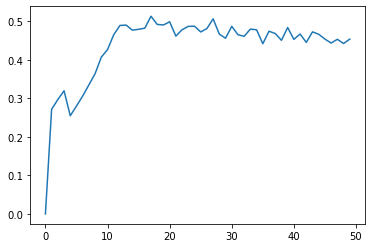

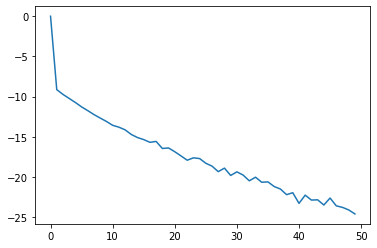

In [34]:
plt.plot(gCH)
plt.show()
plt.plot(perplexity)
plt.show()

In [35]:
print("The maximum coherence achieved is", max(gCH), "and its corresponding number of topics is", np.argmax(gCH))
print("The minimum perplexity achieved is", min(perplexity), "and its corresponding number of topics is", np.argmin(perplexity))

The maximum coherence achieved is 0.5126172401479944 and its corresponding number of topics is 17
The minimum perplexity achieved is -24.61773525644798 and its corresponding number of topics is 49


In [36]:
lda_display = pyLDAvis.gensim.prepare(lda_model_tfidf_17, tfidf_corp, 
                                          dictionary, mds='mmds')
pyLDAvis.display(lda_display, template_type='notebook')